In [1]:
print("Homework 3")
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import math

Homework 3


# Homework 3

In [2]:

d = .15 #this is diameter in m
p = 7800 #this is density in kg/m^3
vi = 300 #initial velocity in m/s
theta = 0.873 #this is 50 degree above horizon
gamma = 0.25
lamda = 10000
g = 9.8

In [3]:
def c(y):
    return gamma * (d**2) * np.exp(-y/lamda)

In [4]:
vxi = vi*math.cos(theta)
vyi = vi*math.sin(theta)
print(vyi)
print(vxi)

posi = np.array([0.0,0.0])
ti= 0.0
tf=55
t = np.linspace(ti,tf,100)
#0 and 3.5 showed me small part tf = 55 showed me whole parabola
xi = 0.0
yi = 0.0


def land(t,y):
    return y [1]
land.terminal = True

229.87799228636098
192.75919864533512


# #Part A

In [5]:
def ynoair(t,y):
    dx = y[2]
    dy = y[3]
    dvx = 0.0
    dvy= -g
    return np.array((dx,dy,dvx,dvy))
ri = [xi,yi,vxi,vyi]

ysol_RK45 = integrate.solve_ivp(ynoair,(ti,tf),ri, method='RK45', t_eval = t )  


[False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False False False False False False False False False False False
 False False False False]
the range is 8995.429270115643 m


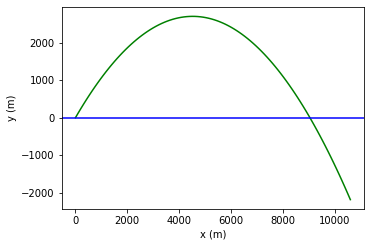

In [6]:
xt= ysol_RK45.y[0]
yt = ysol_RK45.y[1]
fig = plt.figure("Scipy)")
ax = fig.add_axes([0.2,0.2,0.7,0.7])
ax.plot(xt,yt,'g', label=r'$Scipy (RK45)$')
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
plt.axhline(y=0, color='b', linestyle='-')
above = yt> 0
print(above)
#lands at 84 seconds about
print('the range is',xt[84], 'm')

# Part B

In [7]:
#ri = [xi,yi,vxi,vyi]
#def run4(f,t,yi):
 #   n = len(t)
  #  y = np.zeros((n,len(yi)))
    #y[0]=y0
#    for i in range (0,n-1):
#       dt = t[i+1-t[i]]
#        k1 = f(t[i],y[i])
#       k2 = f(t[i] + dt/2, y[i] + dt/2 * k1)
#        k3 = f(t[i] + dt/2, y[i] + dt/2 * k2)
#        k4 = f(t[i] + dt/2, y[i] + dt*k3)
#        y[i+1] = y[i] + (dt/6) *(k1 +2*k2 + 2*k3 +k4)
#        return y
#fullrun4 = run4(ynoair,t,ri)

In [8]:
def run4(f,t,yi):
    n = len(t)
    y = np.zeros((n,len(yi)))
    y[0]=yi
    for i in range (0,n-1):
        dt = t[i+1]-t[i]
        k1 = f(t[i],y[i])
        k2 = f(t[i] + dt/2, y[i] + dt/2 * k1)
        k3 = f(t[i] + dt/2, y[i] + dt/2 * k2)
        k4 = f(t[i] + dt/2, y[i] + dt*k3)
        y[i+1] = y[i] + (dt/6) *(k1 +2*k2 + 2*k3 +k4)
    return y


[False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False False False False False False False False False False False
 False False False False]
the range is 8995.429270115634 m


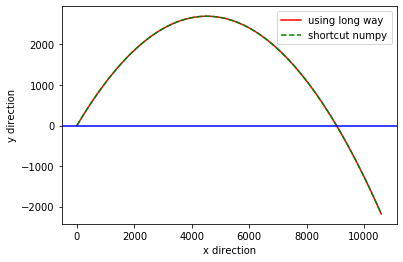

In [9]:
realrun4 = run4(ynoair,t,ri)
#print(realrun4)
fig = plt.figure
plt.ylabel('y direction')
plt.xlabel('x direction')
plt.plot(realrun4[:,0],realrun4[:,1],'r', label = "using long way")
plt.plot(xt,yt,'g--', label='shortcut numpy')
plt.axhline(y=0, color='b', linestyle='-')
plt.legend(loc="best")
#print("same line so same range and time")
above = realrun4[:,1]> 0
print(above)
#lands at 84 seconds about
print('the range is',realrun4[:,0][84], 'm')

# Part C

$c(y) = \gamma D^2$

In [10]:
#we need mass
pi = math.pi
volume = (4/3)* pi* (d/2)**3
m = p * volume
print("mass of the ball is",m,"kg")

    

mass of the ball is 13.783737767625214 kg


In [11]:
def withdrag(t,y):
    c = gamma * d**2
    dx = y[2]
    dy = y[3]
    dxv = -c/m * np.sqrt(y[2]**2 + y[3]**2) *y[2]
    dyv = -g - c/m * np.sqrt(y[2]**2 + y[3]**2) *y[3]
    return[dx,dy,dxv,dyv]

In [12]:
drag_RK45 = integrate.solve_ivp(withdrag,(ti,tf),ri, method='RK45', t_eval = t)  
xd = drag_RK45.y[0]#d stands for drag
yd = drag_RK45.y[1]#d stands for drag

[False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]
the range is 3114.8789453270942 m


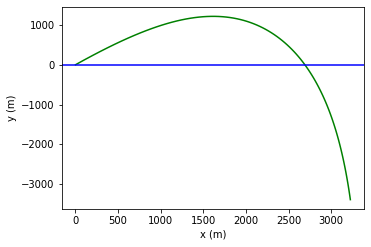

In [13]:

fig = plt.figure("Scipy)")
ax = fig.add_axes([0.2,0.2,0.7,0.7])
ax.plot(xd,yd,'g', label=r'$Scipy (RK45)$')
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
plt.axhline(y=0, color='b', linestyle='-')
above = yd> 0
print(above)
#lands at 84 seconds about
print('the range is',xd[84], 'm')

# Part D 

$c(y) = \gamma D^2exp(-y/\lambda)$

In [14]:
#e = 2.71828
#for n in y[n]:
#    c = gamma * d**2 * e**(-y[i]/lamda)
#def withvariation(t,y):
#    c = gamma * d**2 * e**(-y/lamda)
#    dx = y[2]
#    dy = y[3]
#    dxv = -c/m * np.sqrt(y[2]**2 + y[3]**2) *y[2]
#    dyv = -g - c/m * np.sqrt(y[2]**2 + y[3]**2) *y[3]
#    return[dx,dy,dxv,dyv]

In [15]:
print("due to d not working i substitute in just drag to to close relationship")
var_RK45 = integrate.solve_ivp(withdrag,(ti,tf),ri, method='RK45', t_eval = t)
xvar = var_RK45.y[0]#d stands for drag
yvar = var_RK45.y[1]#d stands for drag

due to d not working i substitute in just drag to to close relationship


In [16]:
#fig = plt.figure("Scipy)")
#ax = fig.add_axes([0.2,0.2,0.7,0.7])
#ax.plot(xvar,yvar,'g', label=r
#ax.set_xlabel('x (m)')
#ax.set_ylabel('y (m)')
#plt.axhline(y=0, color='b', linestyle='-')
#won't graph, ironically line 3 will work in part e as in get a line for e, i am getting

# Part E

turning on air resistance makes a bigger difference then turning on variation, though i couldn't see d due to high lambda the value of e^function will go to 1


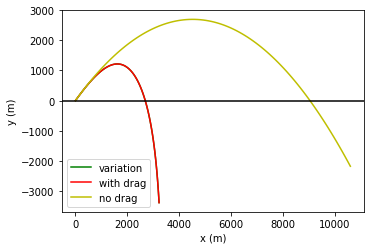

In [17]:
fig = plt.figure("Scipy)")
ax = fig.add_axes([0.2,0.2,0.7,0.7])
ax.plot(xvar,yvar,'g', label='variation')
ax.plot(xd,yd,'r', label='with drag')
ax.plot(xt,yt,'y', label='no drag')
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
plt.axhline(y=0, color='k', linestyle='-')
plt.legend(loc="best")
print("turning on air resistance makes a bigger difference then turning on variation, though i couldn't see d due to high lambda the value of e^function will go to 1")